# Day 2

## Data Basics

### Lists

Often, we have many measurements for a single metric. For instance, suppose we measure the speed(mph) of a car moving on the highway at one minute intervals. We do not want to store all of those measurements in a series of variables. We can store a `list` of values in a single variable.

In [12]:
speed = [56, 61, 62, 66, 67, 68, 69, 76, 77, 78]

With this list, we can extract information about the car.

Is it accelerating or decelerating?

What is its average speed over the period of observation?

What might the next measurement in this list be?

In [21]:
# demo
increasing = False
for i in range(1, len(speed)):
    if speed[i-1] < speed[i]:
        increasing = True
    else:
        increasing = False
        break

print(f"increasing: {increasing}")

decreasing = False
for i in range(1, len(speed)):
    if speed[i-1] > speed[i]:
        decreasing = True
    else:
        decreasing = False
        break

print(f"decreasing: {decreasing}")

avg = 0
for measurement in speed:
    avg += measurement
avg /= len(speed)

print(f"average speed: {avg}")


avg_diff = 0
for i in range(1, len(speed)):
    avg_diff += speed[i] - speed[i-1]
avg_diff /= (len(speed) - 1)

print(f"average difference between measurements in speed: {avg_diff}")
print(f"extrapolated speed measurement at t=11: {speed[-1] + avg_diff}")

increasing: True
decreasing: False
average speed: 68.0
average difference between measurements in speed: 2.4444444444444446
extrapolated speed measurement at t=11: 80.44444444444444


Sometimes we want to take parts of the data, we can use slices to do this.

In [22]:
print(speed[0:5])
print(speed[2:7])
print(speed[-3:])

[56, 61, 62, 66, 67]
[62, 66, 67, 68, 69]
[76, 77, 78]


More often than not, we will be working with data that has more than one dimension.

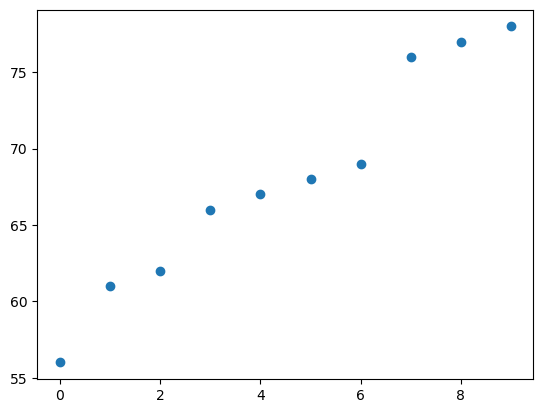

In [23]:
# each sublist represents 
# when the measurement was taken and the measurement itself
# the first sublist says the measurement is 56mph at t=0
speed = [[0, 56], [1, 61], [2, 62], [3, 66], [4, 67],
         [5, 68], [6, 69], [7, 76], [8, 77], [9, 78]]

import matplotlib.pyplot as plt
# example of list comprehention to format data
plt.scatter(
    [sublist[0] for sublist in speed], 
    [sublist[1] for sublist in speed]
)


Thankfully, we have libraries to make handling large data easier.

https://pandas.pydata.org

https://pandas.pydata.org/docs/reference/plotting.html



In [38]:
import pandas as pd

# retrieved from https://data.noaa.gov/datasetsearch/
data = pd.read_csv("./data.csv", header=1)
data['datetime'] = pd.to_datetime(data['Date'])
data.drop('Date', axis=1, inplace=True)
data = data.set_index('datetime')
print(data.columns)
data.columns = ['TAVG', 'TMAX', 'TMIN', 'PRCP', 'SNOW', 'SNWD']
print(data.columns)

Index(['TAVG (Degrees Fahrenheit)', 'TMAX (Degrees Fahrenheit)',
       'TMIN (Degrees Fahrenheit)', 'PRCP (Inches)', 'SNOW (Inches)',
       'SNWD (Inches)'],
      dtype='object')
Index(['TAVG', 'TMAX', 'TMIN', 'PRCP', 'SNOW', 'SNWD'], dtype='object')


In [41]:
data[data.index.year == 2000].describe()

,TAVG,TMAX,TMIN,PRCP,SNOW,SNWD
count,0.0,330.000000,337.000000,363.000000,363.0,360.0
mean,NaN,89.430303,61.451039,0.005647,0.0,0.0
std,NaN,15.552333,13.259705,0.038412,0.0,0.0
min,NaN,60.000000,36.000000,0.000000,0.0,0.0
25%,NaN,76.000000,50.000000,0.000000,0.0,0.0
50%,NaN,89.000000,61.000000,0.000000,0.0,0.0
75%,NaN,103.000000,72.000000,0.000000,0.0,0.0
max,NaN,118.000000,92.000000,0.440000,0.0,0.0


(365,)
(364,)


ValueError: x and y must have same first dimension, but have shapes (364,) and (365,)

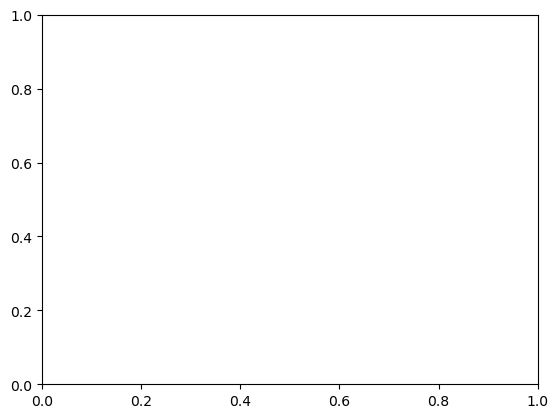

In [72]:
# max_temp_2000 = data[data.index.year == 2000].TMAX.dropna()
# print(max_temp_2000.describe())
# max_temp_2000.plot()

import matplotlib.pyplot as plt
x = data[data.index.year == 2000].index.shape[0]
y1 = data[data.index.year == 1995].TMAX
print(y1.shape)
y2 = data[data.index.year == 2001].TMAX
y2
# print(y2.shape)
# plt.plot(range(x), y1)
# plt.plot(range(x), y2)